## NAME -  ADITYA VIJAY VARGIYA (INTERN AT THE SPARKS FOUNDATION)

### THE SPARKS FOUNDATION GRIP (Graduate Rotational Internship Program) MAY 2021 BATCH
### DATA SCIENCE AND BUSINESS ANALYTICS

### TASK 1:- PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS, USING SUPERVISED ML.




### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the Data

In [2]:
url = "http://bit.ly/w-data"
dataframe = pd.read_csv(url)

In [3]:
dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# To Check first 5 rows of Dataset
dataframe.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [5]:
dataframe.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# Information of the Dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
# Shape Of the Dataset
dataframe.shape

(25, 2)

In [8]:
# Datatype of each Attribute 
dataframe.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
# Checking the presence of Missing values
dataframe.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# To check Statistical Details of Dataset
dataframe.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Data Visualization

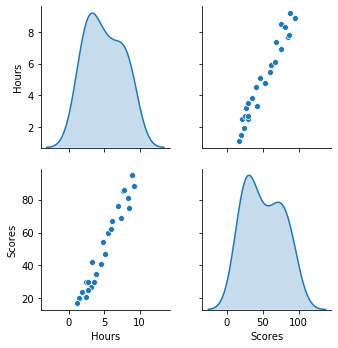

In [11]:
sns.pairplot(dataframe,diag_kind='kde') 

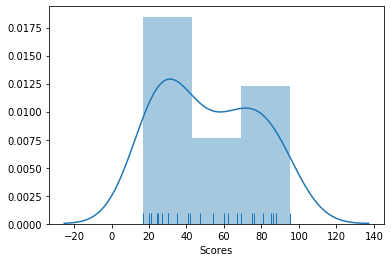

In [12]:
sns.distplot(dataframe['Scores'], kde=True, rug=True)

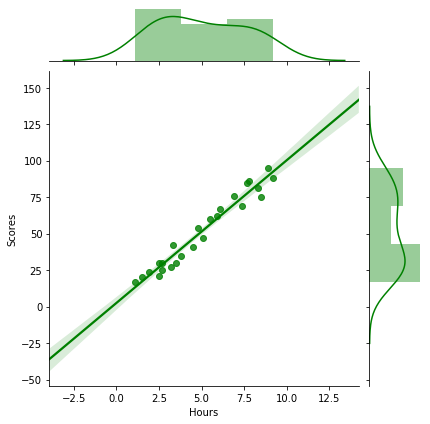

In [13]:
sns.jointplot(dataframe['Hours'], dataframe['Scores'], kind="reg", color='g')

Text(0, 0.5, 'Scores')

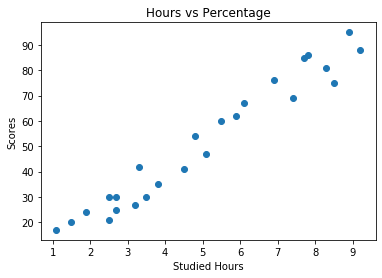

In [14]:
plt.scatter(dataframe['Hours'], dataframe['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')

### Preparing the data 
#### (divide the data into 'attributes' and 'labels')

In [15]:
X = dataframe.iloc[:, :-1].values  
y = dataframe.iloc[:, 1].values  

### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Simple Linear Regression Algorithm on the Training set

In [20]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  

In [21]:
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the Regression line

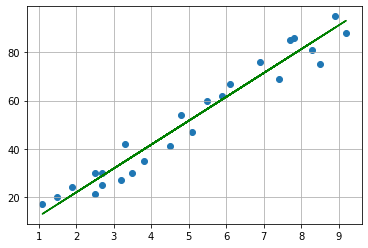

In [24]:
line = lr.coef_*X+lr.intercept_
plt.scatter(X, y)
plt.plot(X, line, 'g')
plt.grid()
plt.show()

### Making Predictions

In [25]:
# Predicting the scores
y_pred = lr.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [29]:
print(y_test)

[20 27 69 30 62]


In [26]:
# Testing data - In Hours

print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting the score if a Student studies for 9.25 hrs/day

In [38]:
hours = 9.25
pred = lr.predict([[hours]])
print("If a student studies for 9.25 hours/day,")
print("the Predicted score will = {}".format(pred[0]))

If a student studies for 9.25 hours/day,
the Predicted score will = 93.69173248737538


### Model Evaluation

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Root Square Error:',np.sqrt (metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Mean Root Square Error: 4.6474476121003665


In [40]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9454906892105356


### Result :- If a student studies for 9.25 hrs/day, the predicted score will be 93.69